In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training=pd.read_csv("fashion-mnist_train.csv")
testing=pd.read_csv("fashion-mnist_test.csv")

In [3]:
training.shape

(60000, 785)

In [4]:
testing.shape

(10000, 785)

In [5]:
training.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
training.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
            ...  
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778    int64
pixel779  

## DATA VISUALIZATION


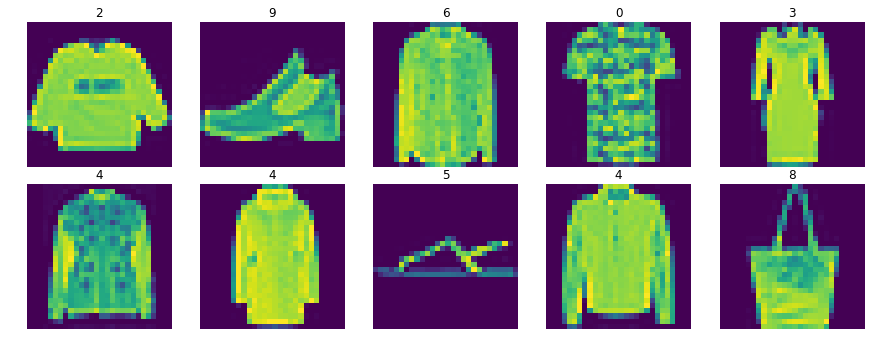

In [7]:
#Visualizing the first 10 images
fig,axes=plt.subplots(2,5,figsize=(15,15))
axes=axes.ravel()
for i in range(0,10):
    axes[i].imshow(training.iloc[i,1:].values.reshape(28,28))
    axes[i].axis('off')
    axes[i].set_title(training.iloc[i,0])
plt.subplots_adjust(bottom=0.3, top=0.6, hspace=0)


## SPLITTING AND RESHAPING THE DATA

In [8]:
Xtrain=training.drop('label',axis=1)/255
Ytrain=training['label']


In [9]:
Xtest=testing.drop('label',axis=1)/255
Ytest=testing['label']

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xvalidate,ytrain,yvalidate=train_test_split(Xtrain,Ytrain,test_size=0.2)

In [11]:
xtrain.shape

(48000, 784)

In [12]:
Xtest.shape

(10000, 784)

In [13]:
xvalidate.shape

(12000, 784)

In [14]:
xtrain=xtrain.iloc[:,:].values.reshape(xtrain.shape[0],*(28,28,1))
Xtest=Xtest.iloc[:,:].values.reshape(Xtest.shape[0],*(28,28,1))
xvalidate=xvalidate.iloc[:,:].values.reshape(xvalidate.shape[0],*(28,28,1))

In [15]:
xtrain.shape

(48000, 28, 28, 1)

In [16]:
Xtest.shape

(10000, 28, 28, 1)

In [17]:
xvalidate.shape

(12000, 28, 28, 1)

## TRAINING THE MODEL

In [18]:
import keras

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout


In [20]:
clf=Sequential()

In [21]:
clf.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))


In [22]:
clf.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
clf.add(Flatten())

In [24]:
clf.add(Dense(units=128,activation='relu'))

In [25]:
clf.add(Dense(units=10,activation='softmax'))

In [26]:
clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
clf.fit(xtrain,ytrain,batch_size=512,epochs=10,validation_data=(xvalidate,yvalidate),verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 407us/step - loss: 0.6261 - acc: 0.7906 - val_loss: 0.4296 - val_acc: 0.8476
Epoch 2/10
48000/48000 [==============================] - 19s 397us/step - loss: 0.3825 - acc: 0.8664 - val_loss: 0.3499 - val_acc: 0.8785
Epoch 3/10
48000/48000 [==============================] - 20s 420us/step - loss: 0.3344 - acc: 0.8842 - val_loss: 0.3224 - val_acc: 0.8855
Epoch 4/10
48000/48000 [==============================] - 22s 455us/step - loss: 0.3079 - acc: 0.8926 - val_loss: 0.3103 - val_acc: 0.8903
Epoch 5/10
48000/48000 [==============================] - 21s 438us/step - loss: 0.2835 - acc: 0.9002 - val_loss: 0.3046 - val_acc: 0.8896
Epoch 6/10
48000/48000 [==============================] - 19s 403us/step - loss: 0.2711 - acc: 0.9046 - val_loss: 0.2755 - val_acc: 0.9015
Epoch 7/10
48000/48000 [==============================] - 19s 386us/step - loss: 0.2500 - acc: 0.9129 - val_loss: 0.

## EVALUATING THE MODEL

In [28]:
evaluation=clf.evaluate(Xtest,Ytest)
print(f'Accuracy : {evaluation[1]}')

10000/10000 [==============================] - 1s 142us/step
Accuracy : 0.9076


In [29]:
predictions=clf.predict(Xtest)

In [47]:
predictions.shape

(10000, 10)

In [52]:
#Since we have softmax activation function,so it will give the probabilities of each class. Predicted class will be the one with 
#highest probability
predclasses=np.argmax(predictions,axis=1)

In [53]:
predclasses.shape

(10000,)

In [54]:
Ytest.shape

(10000,)

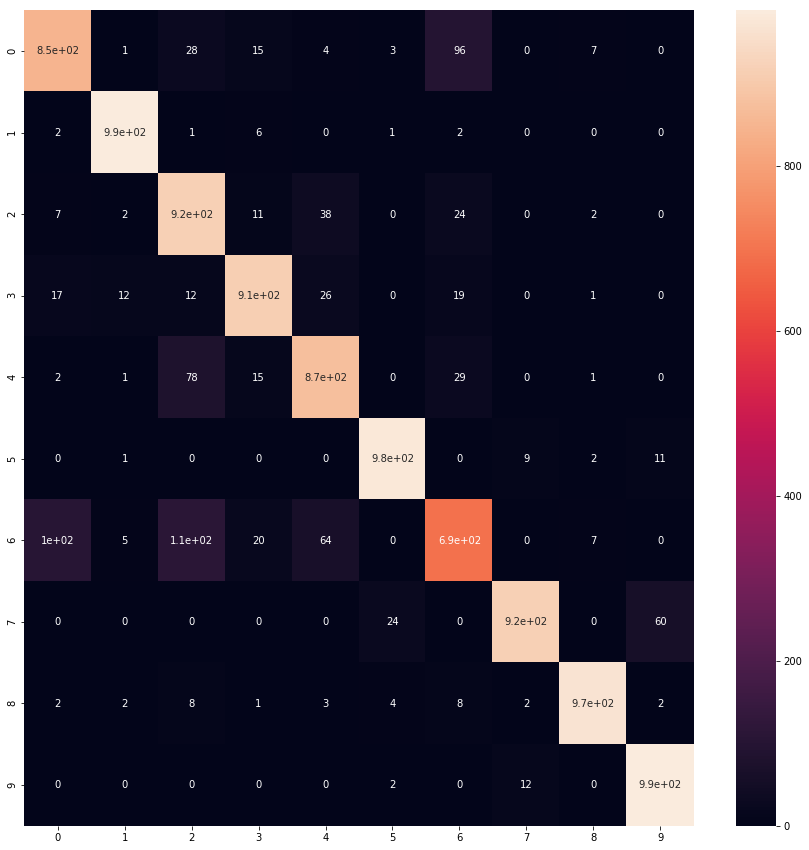

In [56]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(Ytest,predclasses),annot=True)

In [57]:
num_classes=10
names=[f'Class: {i}' for i in range(num_classes)]
print(classification_report(Ytest,predclasses,target_names=names))

             precision    recall  f1-score   support

   Class: 0       0.87      0.85      0.86      1000
   Class: 1       0.98      0.99      0.98      1000
   Class: 2       0.79      0.92      0.85      1000
   Class: 3       0.93      0.91      0.92      1000
   Class: 4       0.87      0.87      0.87      1000
   Class: 5       0.97      0.98      0.97      1000
   Class: 6       0.80      0.69      0.74      1000
   Class: 7       0.98      0.92      0.94      1000
   Class: 8       0.98      0.97      0.97      1000
   Class: 9       0.93      0.99      0.96      1000

avg / total       0.91      0.91      0.91     10000

